In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df=sb.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
df.rename(columns={'tip':'tip_mark'},inplace=True)
df

,total_bill,tip_mark,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip_mark      244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [7]:
df.describe()

,total_bill,tip_mark,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [21]:
df['tip_mark'] = df['tip_mark'].apply(lambda tip_mark_: 1 if tip_mark_>3 else 0)


In [22]:
df

,total_bill,tip_mark,sex,smoker,day,time,size
0,16.99,0,Female,No,Sun,Dinner,2
1,10.34,0,Male,No,Sun,Dinner,3
2,21.01,1,Male,No,Sun,Dinner,3
3,23.68,1,Male,No,Sun,Dinner,2
4,24.59,1,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,1,Male,No,Sat,Dinner,3
240,27.18,0,Female,Yes,Sat,Dinner,2
241,22.67,0,Male,Yes,Sat,Dinner,2
242,17.82,0,Male,No,Sat,Dinner,2


In [23]:
df.head()

,total_bill,tip_mark,sex,smoker,day,time,size
0,16.99,0,Female,No,Sun,Dinner,2
1,10.34,0,Male,No,Sun,Dinner,3
2,21.01,1,Male,No,Sun,Dinner,3
3,23.68,1,Male,No,Sun,Dinner,2
4,24.59,1,Female,No,Sun,Dinner,4


In [24]:
df.tail()

,total_bill,tip_mark,sex,smoker,day,time,size
239,29.03,1,Male,No,Sat,Dinner,3
240,27.18,0,Female,Yes,Sat,Dinner,2
241,22.67,0,Male,Yes,Sat,Dinner,2
242,17.82,0,Male,No,Sat,Dinner,2
243,18.78,0,Female,No,Thur,Dinner,2


In [25]:
df.sample(7)

,total_bill,tip_mark,sex,smoker,day,time,size
210,30.06,0,Male,Yes,Sat,Dinner,3
160,21.50,1,Male,No,Sun,Dinner,4
69,15.01,0,Male,Yes,Sat,Dinner,2
54,25.56,1,Male,No,Sun,Dinner,4
114,25.71,1,Female,No,Sun,Dinner,3
10,10.27,0,Male,No,Sun,Dinner,2
71,17.07,0,Female,No,Sat,Dinner,3


In [26]:
print(df.groupby('day').sum())

      total_bill  tip_mark  size
day                             
Thur     1096.33        18   152
Fri       325.88         6    40
Sat      1778.40        32   219
Sun      1627.16        42   216


In [27]:
print(df.groupby('day').count())

      total_bill  tip_mark  sex  smoker  time  size
day                                                
Thur          62        62   62      62    62    62
Fri           19        19   19      19    19    19
Sat           87        87   87      87    87    87
Sun           76        76   76      76    76    76


In [28]:
df2=df.groupby('day').sum()
df2

,total_bill,tip_mark,size
day,,,
Thur,1096.33,18,152
Fri,325.88,6,40
Sat,1778.40,32,219
Sun,1627.16,42,216


In [29]:
df2.drop('size',inplace=True,axis=1)
df2

,total_bill,tip_mark
day,,
Thur,1096.33,18
Fri,325.88,6
Sat,1778.40,32
Sun,1627.16,42


In [33]:
df2['percent']=df2['tip_mark']/df2['total_bill']*100
df2['percent']

day
Thur    1.641841
Fri     1.841169
Sat     1.799370
Sun     2.581184
Name: percent, dtype: float64

In [34]:
df3=df.groupby(['smoker','sex']).sum()
df3

total_bill  tip_mark  size
smoker sex                               
Yes    Male       1337.07        25   150
       Female      593.27        14    74
No     Male       1919.75        41   263
       Female      977.68        18   140

In [36]:
df3['percent']=df3['tip_mark']/df3['total_bill']*100
df3

total_bill  tip_mark  size   percent
smoker sex                                         
Yes    Male       1337.07        25   150  1.869760
       Female      593.27        14    74  2.359802
No     Male       1919.75        41   263  2.135695
       Female      977.68        18   140  1.841093

In [37]:
df4=df.groupby(['day','size']).sum()
df4

total_bill  tip_mark
day  size                      
Thur 1          10.07       0.0
     2         727.53       8.0
     3          76.64       2.0
     4         149.75       4.0
     5          41.19       1.0
     6          91.15       3.0
Fri  1           8.58       0.0
     2         261.15       5.0
     3          15.98       0.0
     4          40.17       1.0
     5            NaN       NaN
     6            NaN       NaN
Sat  1          10.32       0.0
     2         892.37      16.0
     3         459.17      10.0
     4         388.39       6.0
     5          28.15       0.0
     6            NaN       NaN
Sun  1            NaN       NaN
     2         684.84      15.0
     3         332.76      10.0
     4         480.39      14.0
     5          81.00       2.0
     6          48.17       1.0

In [39]:
df4['percent']=df4['tip_mark']/df4['total_bill']*100
df4

total_bill  tip_mark   percent
day  size                                
Thur 1          10.07       0.0  0.000000
     2         727.53       8.0  1.099611
     3          76.64       2.0  2.609603
     4         149.75       4.0  2.671119
     5          41.19       1.0  2.427774
     6          91.15       3.0  3.291278
Fri  1           8.58       0.0  0.000000
     2         261.15       5.0  1.914608
     3          15.98       0.0  0.000000
     4          40.17       1.0  2.489420
     5            NaN       NaN       NaN
     6            NaN       NaN       NaN
Sat  1          10.32       0.0  0.000000
     2         892.37      16.0  1.792978
     3         459.17      10.0  2.177843
     4         388.39       6.0  1.544839
     5          28.15       0.0  0.000000
     6            NaN       NaN       NaN
Sun  1            NaN       NaN       NaN
     2         684.84      15.0  2.190293
     3         332.76      10.0  3.005169
     4         480.39      14.0  2.914299
     5          81.00       2.0  2.469136
     6          48.17       1.0  2.075981

In [40]:
df5=df4.dropna(axis=0)
df5

total_bill  tip_mark   percent
day  size                                
Thur 1          10.07       0.0  0.000000
     2         727.53       8.0  1.099611
     3          76.64       2.0  2.609603
     4         149.75       4.0  2.671119
     5          41.19       1.0  2.427774
     6          91.15       3.0  3.291278
Fri  1           8.58       0.0  0.000000
     2         261.15       5.0  1.914608
     3          15.98       0.0  0.000000
     4          40.17       1.0  2.489420
Sat  1          10.32       0.0  0.000000
     2         892.37      16.0  1.792978
     3         459.17      10.0  2.177843
     4         388.39       6.0  1.544839
     5          28.15       0.0  0.000000
Sun  2         684.84      15.0  2.190293
     3         332.76      10.0  3.005169
     4         480.39      14.0  2.914299
     5          81.00       2.0  2.469136
     6          48.17       1.0  2.075981

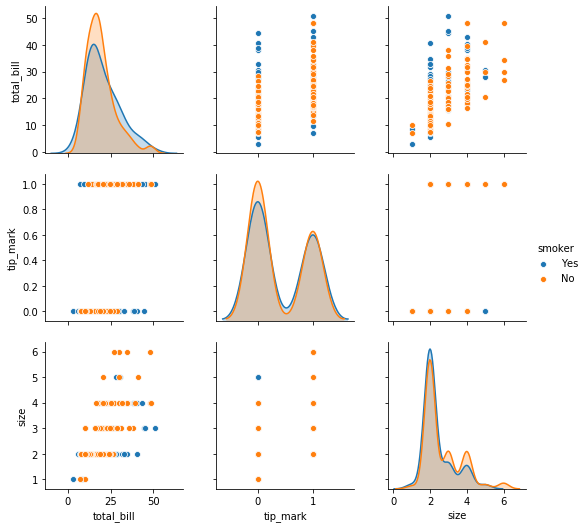

In [41]:
sb.pairplot(df,hue='smoker')

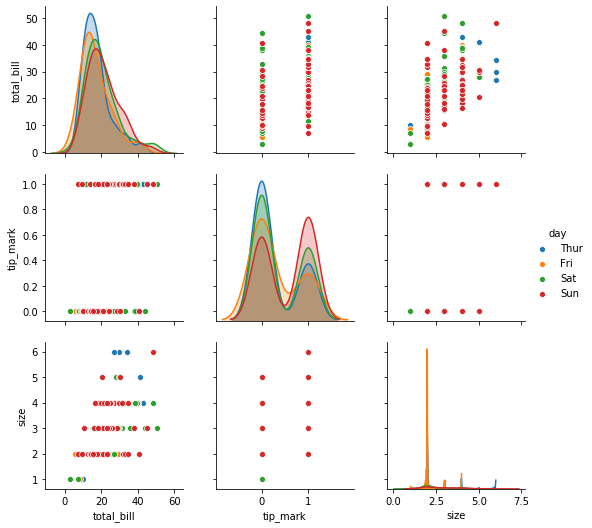

In [42]:
sb.pairplot(df,hue='day')

In [45]:
df.replace({'sex':{'Male':0,'Female':1},'smoker':{'No':0,'Yes':1}},inplace=True)
df.head()

,total_bill,tip_mark,sex,smoker,day,time,size
0,16.99,0,1,0,Sun,Dinner,2
1,10.34,0,0,0,Sun,Dinner,3
2,21.01,1,0,0,Sun,Dinner,3
3,23.68,1,0,0,Sun,Dinner,2
4,24.59,1,1,0,Sun,Dinner,4


In [48]:
days=pd.get_dummies(df['day'])
days.sample(7)

day,Thur,Fri,Sat,Sun
71,0,0,1,0
41,0,0,0,1
212,0,0,1,0
18,0,0,0,1
185,0,0,0,1
157,0,0,0,1
172,0,0,0,1


In [49]:
days=pd.get_dummies(df['day'],drop_first=True)
days.sample(6)

day,Fri,Sat,Sun
167,0,0,1
206,0,1,0
155,0,0,1
196,0,0,0
62,0,1,0
25,0,1,0


In [50]:
days=pd.get_dummies(df['day'],drop_first=True)
df=pd.concat([df,days],axis=1)
df.tail(5)

,total_bill,tip_mark,sex,smoker,day,time,size,Fri,Sat,Sun
239,29.03,1,0,0,Sat,Dinner,3,0,1,0
240,27.18,0,1,1,Sat,Dinner,2,0,1,0
241,22.67,0,0,1,Sat,Dinner,2,0,1,0
242,17.82,0,0,0,Sat,Dinner,2,0,1,0
243,18.78,0,1,0,Thur,Dinner,2,0,0,0


In [51]:
times=pd.get_dummies(df['time'],drop_first=True)
df=pd.concat([df,times],axis=1)
df.head(5)

,total_bill,tip_mark,sex,smoker,day,time,size,Fri,Sat,Sun,Dinner
0,16.99,0,1,0,Sun,Dinner,2,0,0,1,1
1,10.34,0,0,0,Sun,Dinner,3,0,0,1,1
2,21.01,1,0,0,Sun,Dinner,3,0,0,1,1
3,23.68,1,0,0,Sun,Dinner,2,0,0,1,1
4,24.59,1,1,0,Sun,Dinner,4,0,0,1,1


In [52]:
x=df[['total_bill','sex','smoker','size','Fri','Sat','Sun','Dinner']]
y=df[['tip_mark']]

In [53]:
y

,tip_mark
0,0
1,0
2,1
3,1
4,1
...,...
239,1
240,0
241,0
242,0


In [54]:
x

,total_bill,sex,smoker,size,Fri,Sat,Sun,Dinner
0,16.99,1,0,2,0,0,1,1
1,10.34,0,0,3,0,0,1,1
2,21.01,0,0,3,0,0,1,1
3,23.68,0,0,2,0,0,1,1
4,24.59,1,0,4,0,0,1,1
...,...,...,...,...,...,...,...,...
239,29.03,0,0,3,0,1,0,1
240,27.18,1,1,2,0,1,0,1
241,22.67,0,1,2,0,1,0,1
242,17.82,0,0,2,0,1,0,1


In [55]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [81]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.9,random_state=73)

In [82]:
lr_mod=LinearRegression()
lr_mod.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
predictions=lr_mod.predict(x_test)
print(predictions)

[[ 0.56681508]
 [ 0.0593871 ]
 [ 0.44719626]
 [-0.06963215]
 [ 0.09029153]
 [ 0.91717862]
 [ 0.3532765 ]
 [ 0.33584659]
 [ 0.34720987]
 [ 0.91201501]
 [ 0.3129999 ]
 [ 0.08442539]
 [ 0.14330969]
 [ 0.86758467]
 [-0.06839639]
 [ 0.51239043]
 [ 0.36347393]
 [ 0.48282731]
 [ 0.58496306]
 [ 0.38504244]
 [ 0.46817652]
 [-0.16930192]
 [ 1.15827388]
 [ 0.6136336 ]
 [ 0.2311479 ]
 [ 0.35639245]
 [ 0.58612053]
 [ 0.49562392]
 [ 0.05132443]
 [ 0.50036304]
 [-0.09527195]
 [ 0.48876383]
 [ 0.61247852]
 [ 0.18043914]
 [ 0.68458282]
 [-0.14022354]
 [ 0.19339749]
 [ 0.51044445]
 [ 0.27042349]
 [ 0.26620822]
 [-0.10040274]
 [-0.15099181]
 [ 1.11944941]
 [ 0.6418904 ]
 [ 0.17117506]
 [ 0.43381402]
 [ 0.50553528]
 [ 0.74873886]
 [ 0.18778044]
 [ 0.19316026]
 [-0.02759439]
 [ 0.60304299]
 [-0.01415032]
 [ 0.15577018]
 [-0.069618  ]
 [ 0.23967006]
 [ 0.57408453]
 [ 0.29014952]
 [ 0.30288175]
 [ 0.93287086]
 [-0.03931801]
 [ 0.66418407]
 [ 0.18436852]
 [ 0.16731514]
 [ 0.9751388 ]
 [ 0.10318512]
 [ 0.18716

In [96]:
myvals=np.array([100,1,0,4,1,0,0,1]).reshape(1,-1)
lr_mod.predict(myvals)

array([[2.02202839]])

In [97]:
lr_mod.score(x_train,y_train)

0.40876248907879015